
<h2> 1. Linear Regression and Multiple Linear Regression <h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [2]:
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')


Saved as 'automobileEDA.csv'


In [3]:
df = pd.read_csv("automobileEDA.csv", header=0)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
from sklearn.linear_model import LinearRegression
#create linear regression object
lm = LinearRegression()
lm


LinearRegression()

In [5]:
#we will look how highway-mpg variable can help us predict price.
#create a linear function with highway_mpg as predictor variable and price as a response variable
X = df[['highway-mpg']]
Y = df['price']

In [6]:
#fit the linear model using highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [7]:
#output a prediction
Yhat = lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [8]:
#value of the intercept
lm.intercept_

38423.3058581574

In [9]:
#value of the slope
lm.coef_

array([-821.73337832])

<p> The linear model we get plugging the actual values: Price = 38423.31 - 821.73 x highway-mpg <p/>

In [10]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [11]:
#train the model using "engine-size" as the independent variable and "price" as the dependent variable
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [12]:
#find the slope and the intercept of the model
lm1.coef_

array([[166.86001569]])

In [13]:
lm1.intercept_

array([-7963.33890628])

In [14]:
#equation for the predicted line:
Yhat = - 7963.34 + 166.86*X

In [15]:
Price = - 7963.34 + 166.86*df['engine-size']
Price

0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64

<h3> Multiple Linear Regression <h3/> 

In [16]:
#other predictors of price could be: horsepower, curb-weight, engine-size, highway-mpg
#develop a model using these variables as the predictor variable
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

#fit the linear model using the four above-mentioned variables
lm.fit(Z, df['price'])



LinearRegression()

In [17]:
#value of the intercept
lm.intercept_

-15806.62462632923

In [18]:
#value of the slope
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<p2> Final estimated linear model:<p2/>
<p2> price = -15806.62462632923 + 53.49574423 * horsepower + 4.70770099 * curb-weight + 81.53026382 * engine-size + 36.05748882 * highway-mpg<p2/>

<h2> 2. Model Evaluation Using Visualization <h2/>

(0.0, 48177.397709410754)

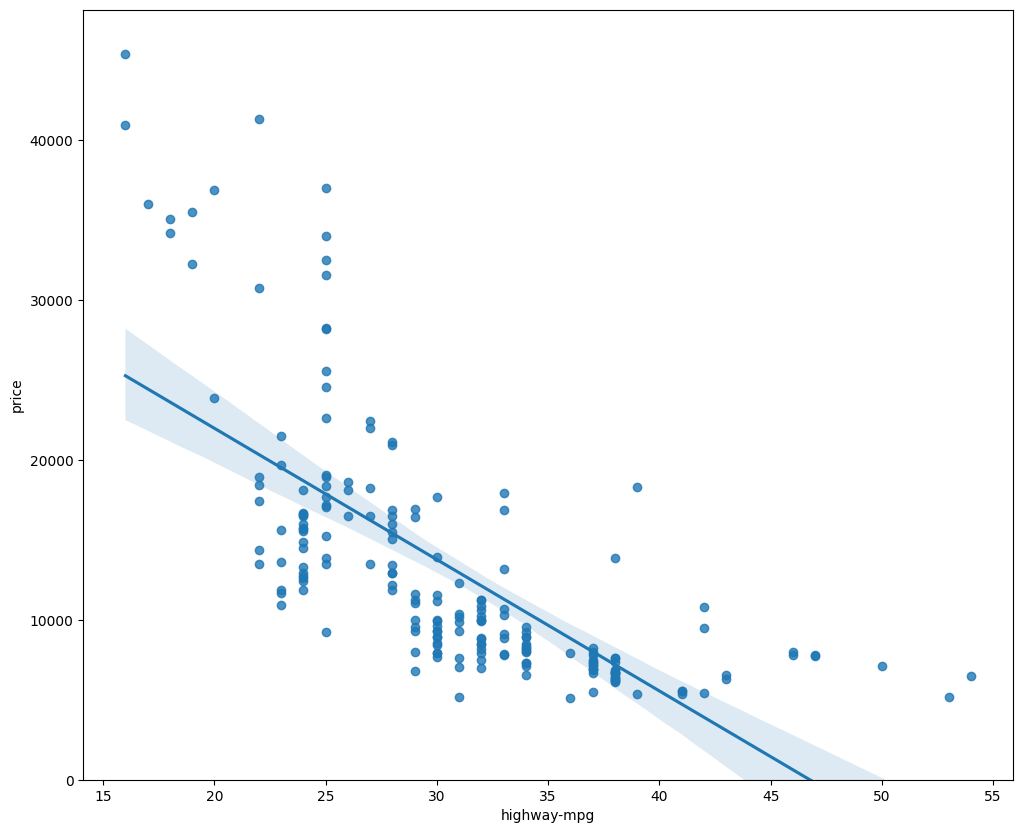

In [19]:
import seaborn as sns
%matplotlib inline 

#visualize highway-mpg as potential predictor variable of price:
plt.figure(figsize=(12, 10))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
#we can see that price is negatively correlated to highway-mpg

(0.0, 47414.1)

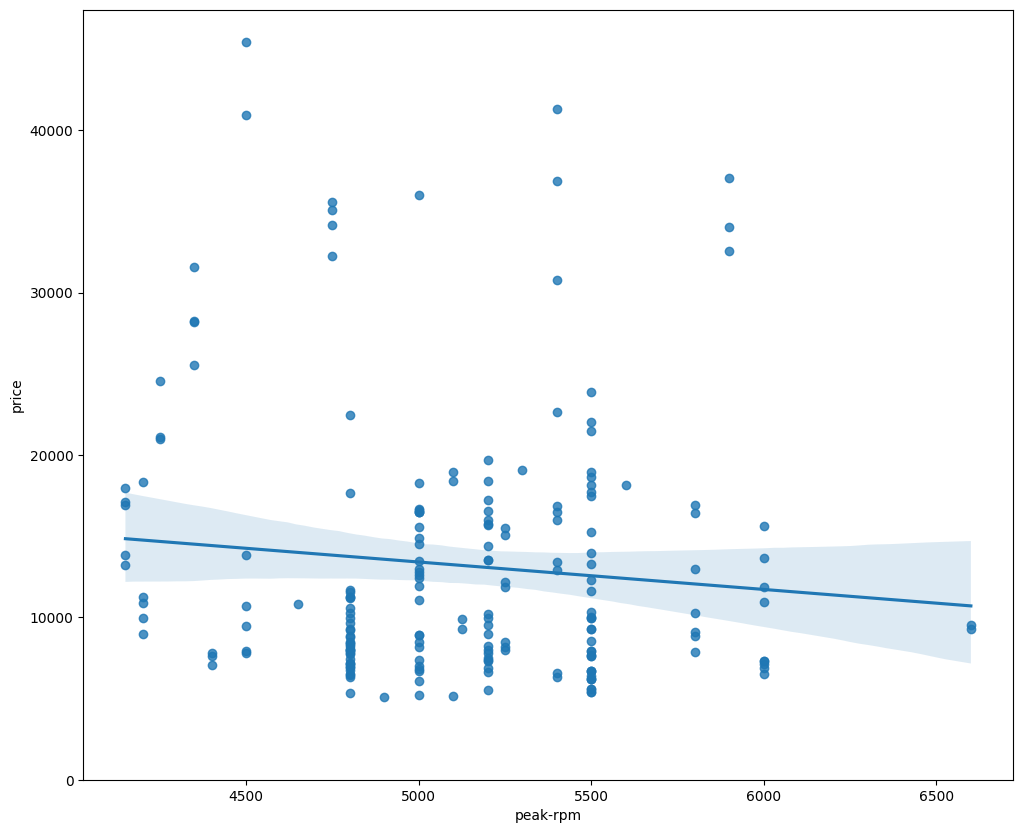

In [20]:
#compare this plot to the regression plot of "peak-rpm"

plt.figure(figsize=(12, 10))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" are more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.<p/>


In [21]:
# check if "peak-rpm" or "highway-mpg" more strongly correlated with "price"
df[["peak-rpm","highway-mpg","price"]].corr()
# "highway-mpg" (-0.704692) is stronger correlated with "price" than "peak-rpm" (-0.101616).

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


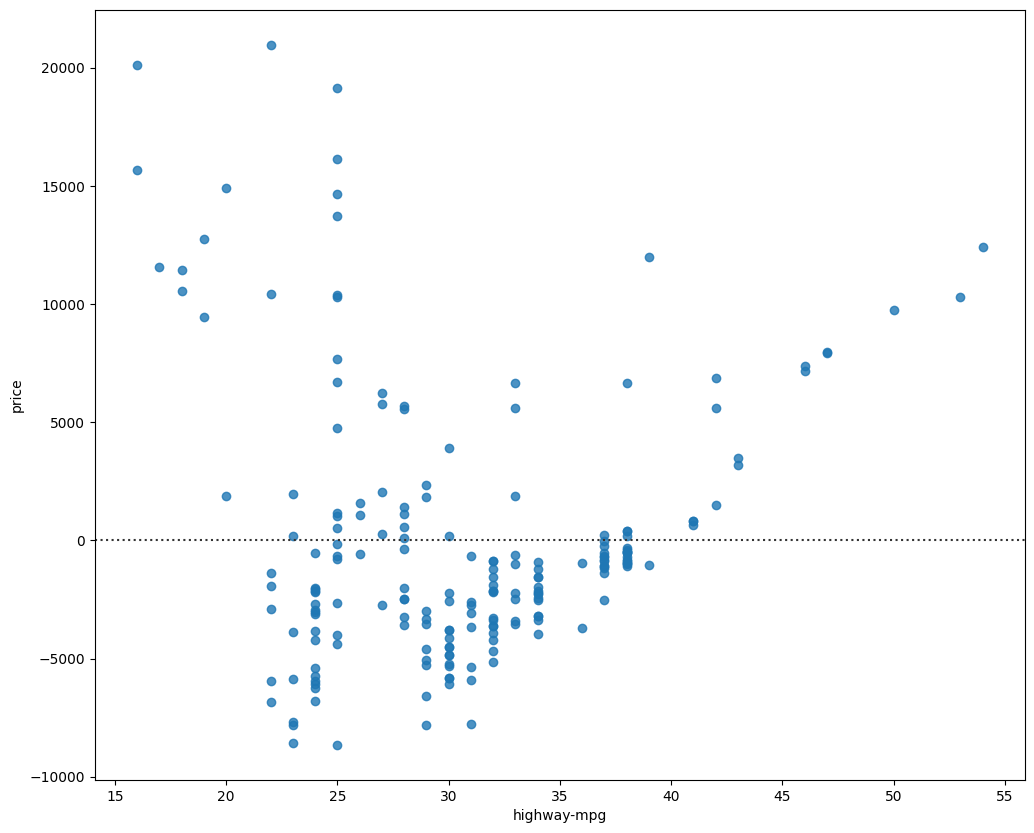

In [22]:
#residual plot (shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis)
plt.figure(figsize=(12, 10))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

<p>The residuals are not randomly spread around the x-axis, which means that variance is not constant, leading us to believe that maybe a non-linear model is more appropriate for this data.<p/>

<h3>Multiple Linear Regression<h3/>

In [23]:
Y_hat = lm.predict(Z)

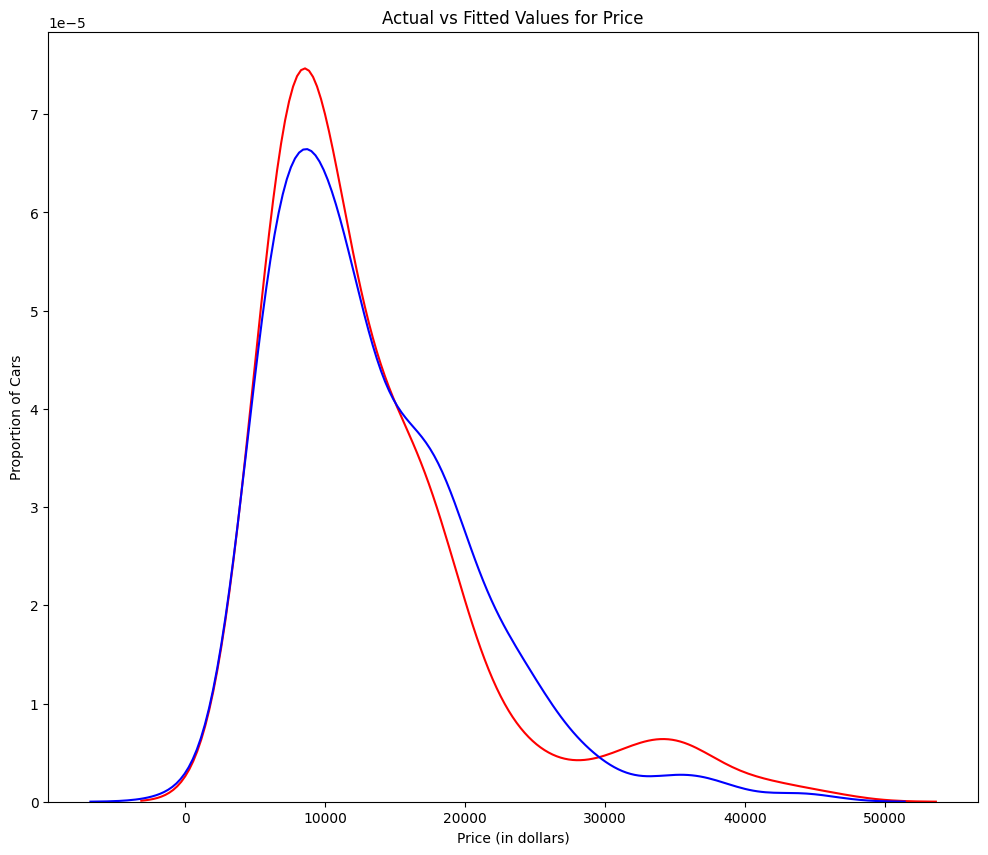

In [24]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p> The fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, the model presents some room for improvement. <p/>

<h3/> Polinomial Regression <h3/>

<p>We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. We will try fitting a polynomial model to the data instead.<p/>

In [36]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [37]:
x = df['highway-mpg']
y = df['price']

In [38]:
#polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


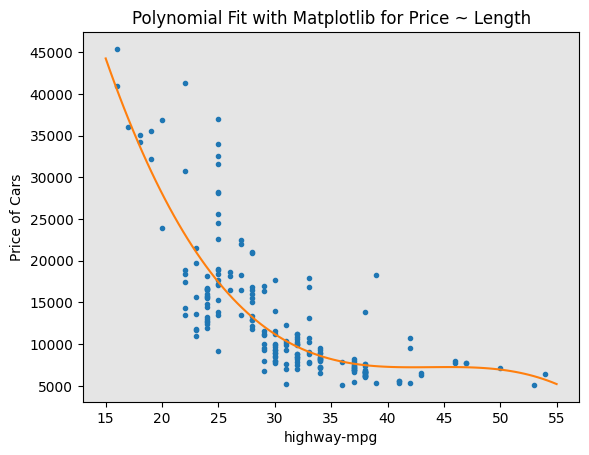

In [39]:
PlotPolly(p, x, y, 'highway-mpg')

<p>We can see that polynomial model performs better than the linear model.<p>